In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load dataset 
df = pd.read_csv("D:\project\Elevate\Task 1\Titanic-Dataset.csv")


In [3]:
# 1. Generate Summary Statistics
print("\nSummary Statistics:")
print(df.describe(include='all'))

# Include median separately since describe() does not include it
print("\nMedian Values:")
print(df.median(numeric_only=True))



Summary Statistics:
        PassengerId    Survived      Pclass                     Name   Sex  \
count    891.000000  891.000000  891.000000                      891   891   
unique          NaN         NaN         NaN                      891     2   
top             NaN         NaN         NaN  Braund, Mr. Owen Harris  male   
freq            NaN         NaN         NaN                        1   577   
mean     446.000000    0.383838    2.308642                      NaN   NaN   
std      257.353842    0.486592    0.836071                      NaN   NaN   
min        1.000000    0.000000    1.000000                      NaN   NaN   
25%      223.500000    0.000000    2.000000                      NaN   NaN   
50%      446.000000    0.000000    3.000000                      NaN   NaN   
75%      668.500000    1.000000    3.000000                      NaN   NaN   
max      891.000000    1.000000    3.000000                      NaN   NaN   

               Age       SibSp       Parch


Generating Histograms...


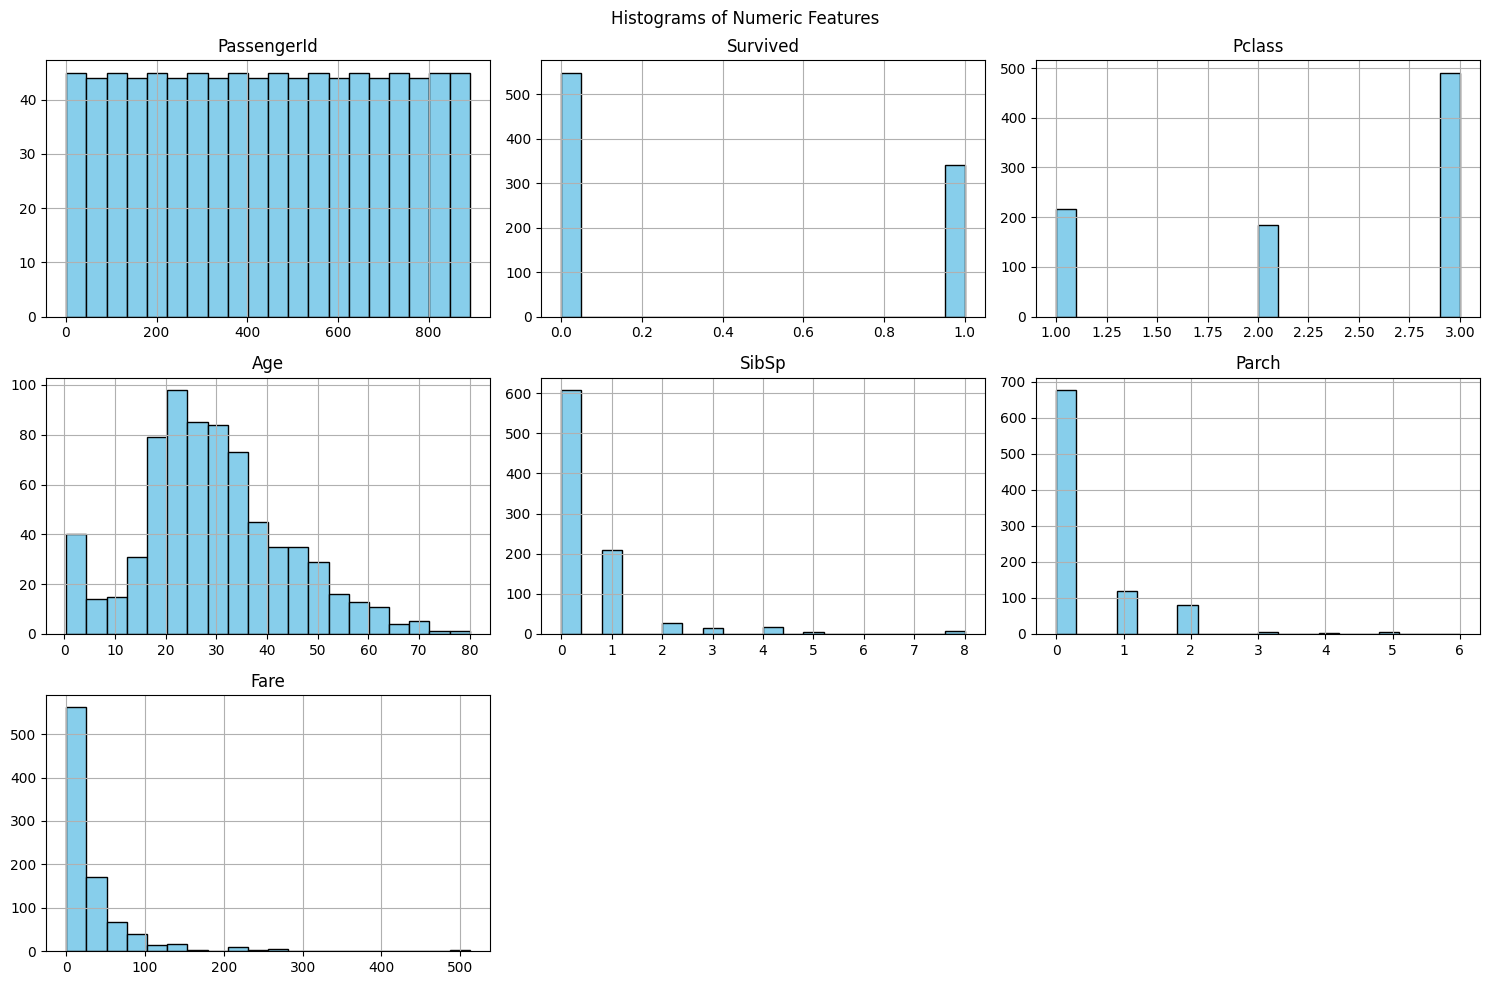


Generating Boxplots...


<Figure size 1500x800 with 0 Axes>

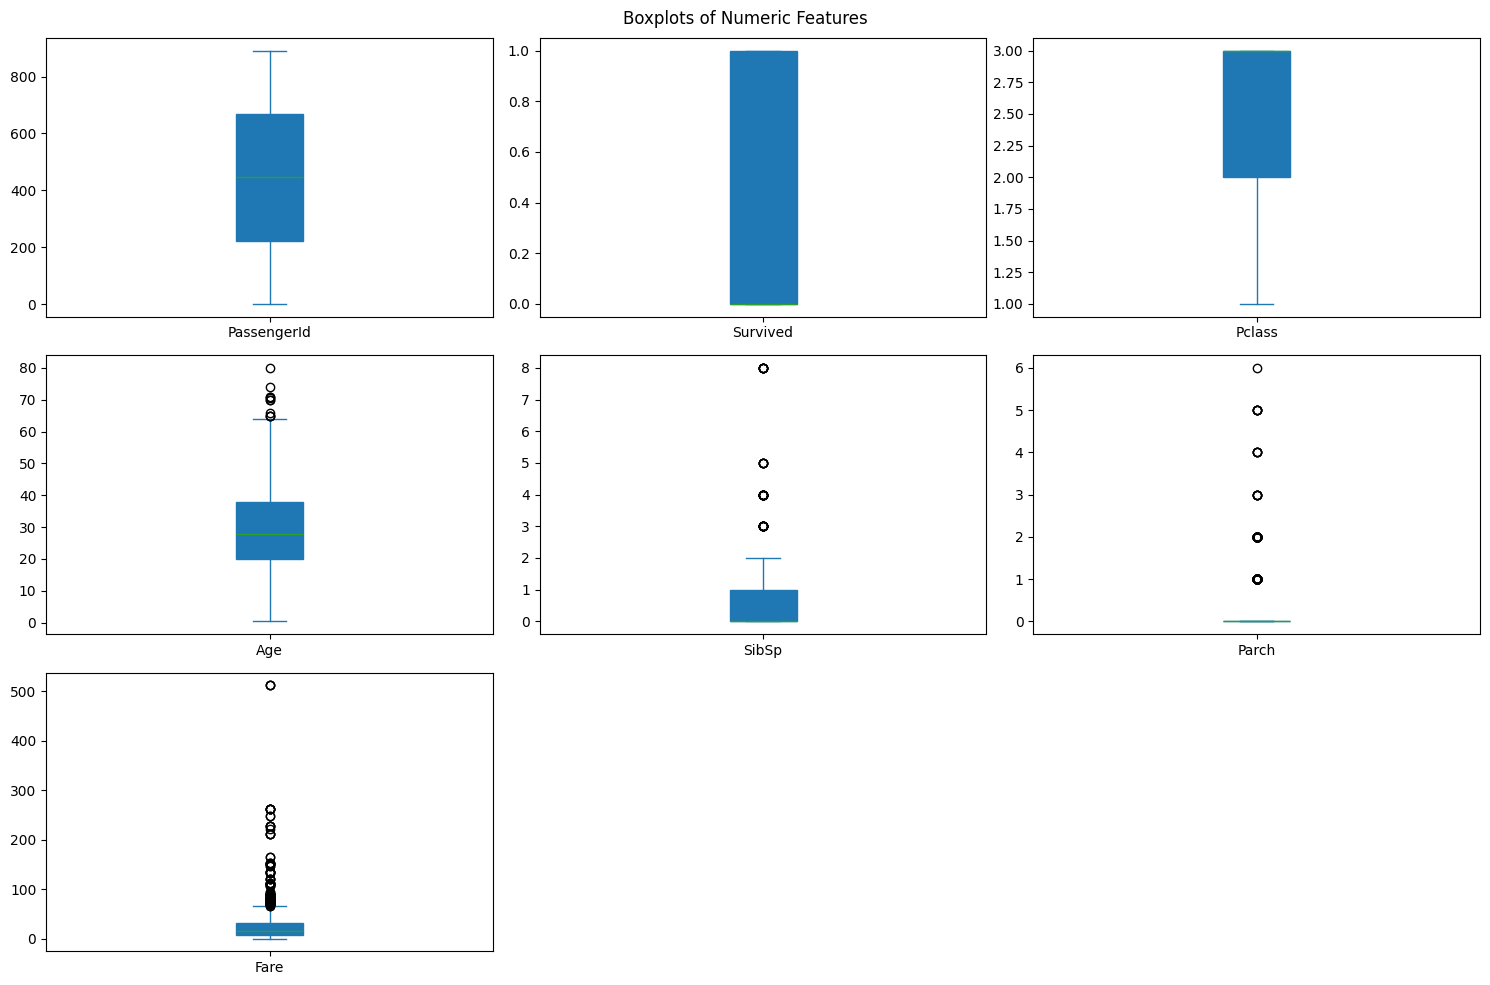

In [4]:
# 2. Create Histograms and Boxplots for Numeric Features
numerical_cols = df.select_dtypes(include=[np.number]).columns

# Histograms
print("\nGenerating Histograms...")
df[numerical_cols].hist(figsize=(15, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numeric Features")
plt.tight_layout()
plt.show()

# Boxplots
print("\nGenerating Boxplots...")
plt.figure(figsize=(15, 8))
df[numerical_cols].plot(kind='box', subplots=True, layout=(int(len(numerical_cols)/3)+1, 3), figsize=(15, 10), patch_artist=True)
plt.suptitle("Boxplots of Numeric Features")
plt.tight_layout()
plt.show()



Generating Pairplot...


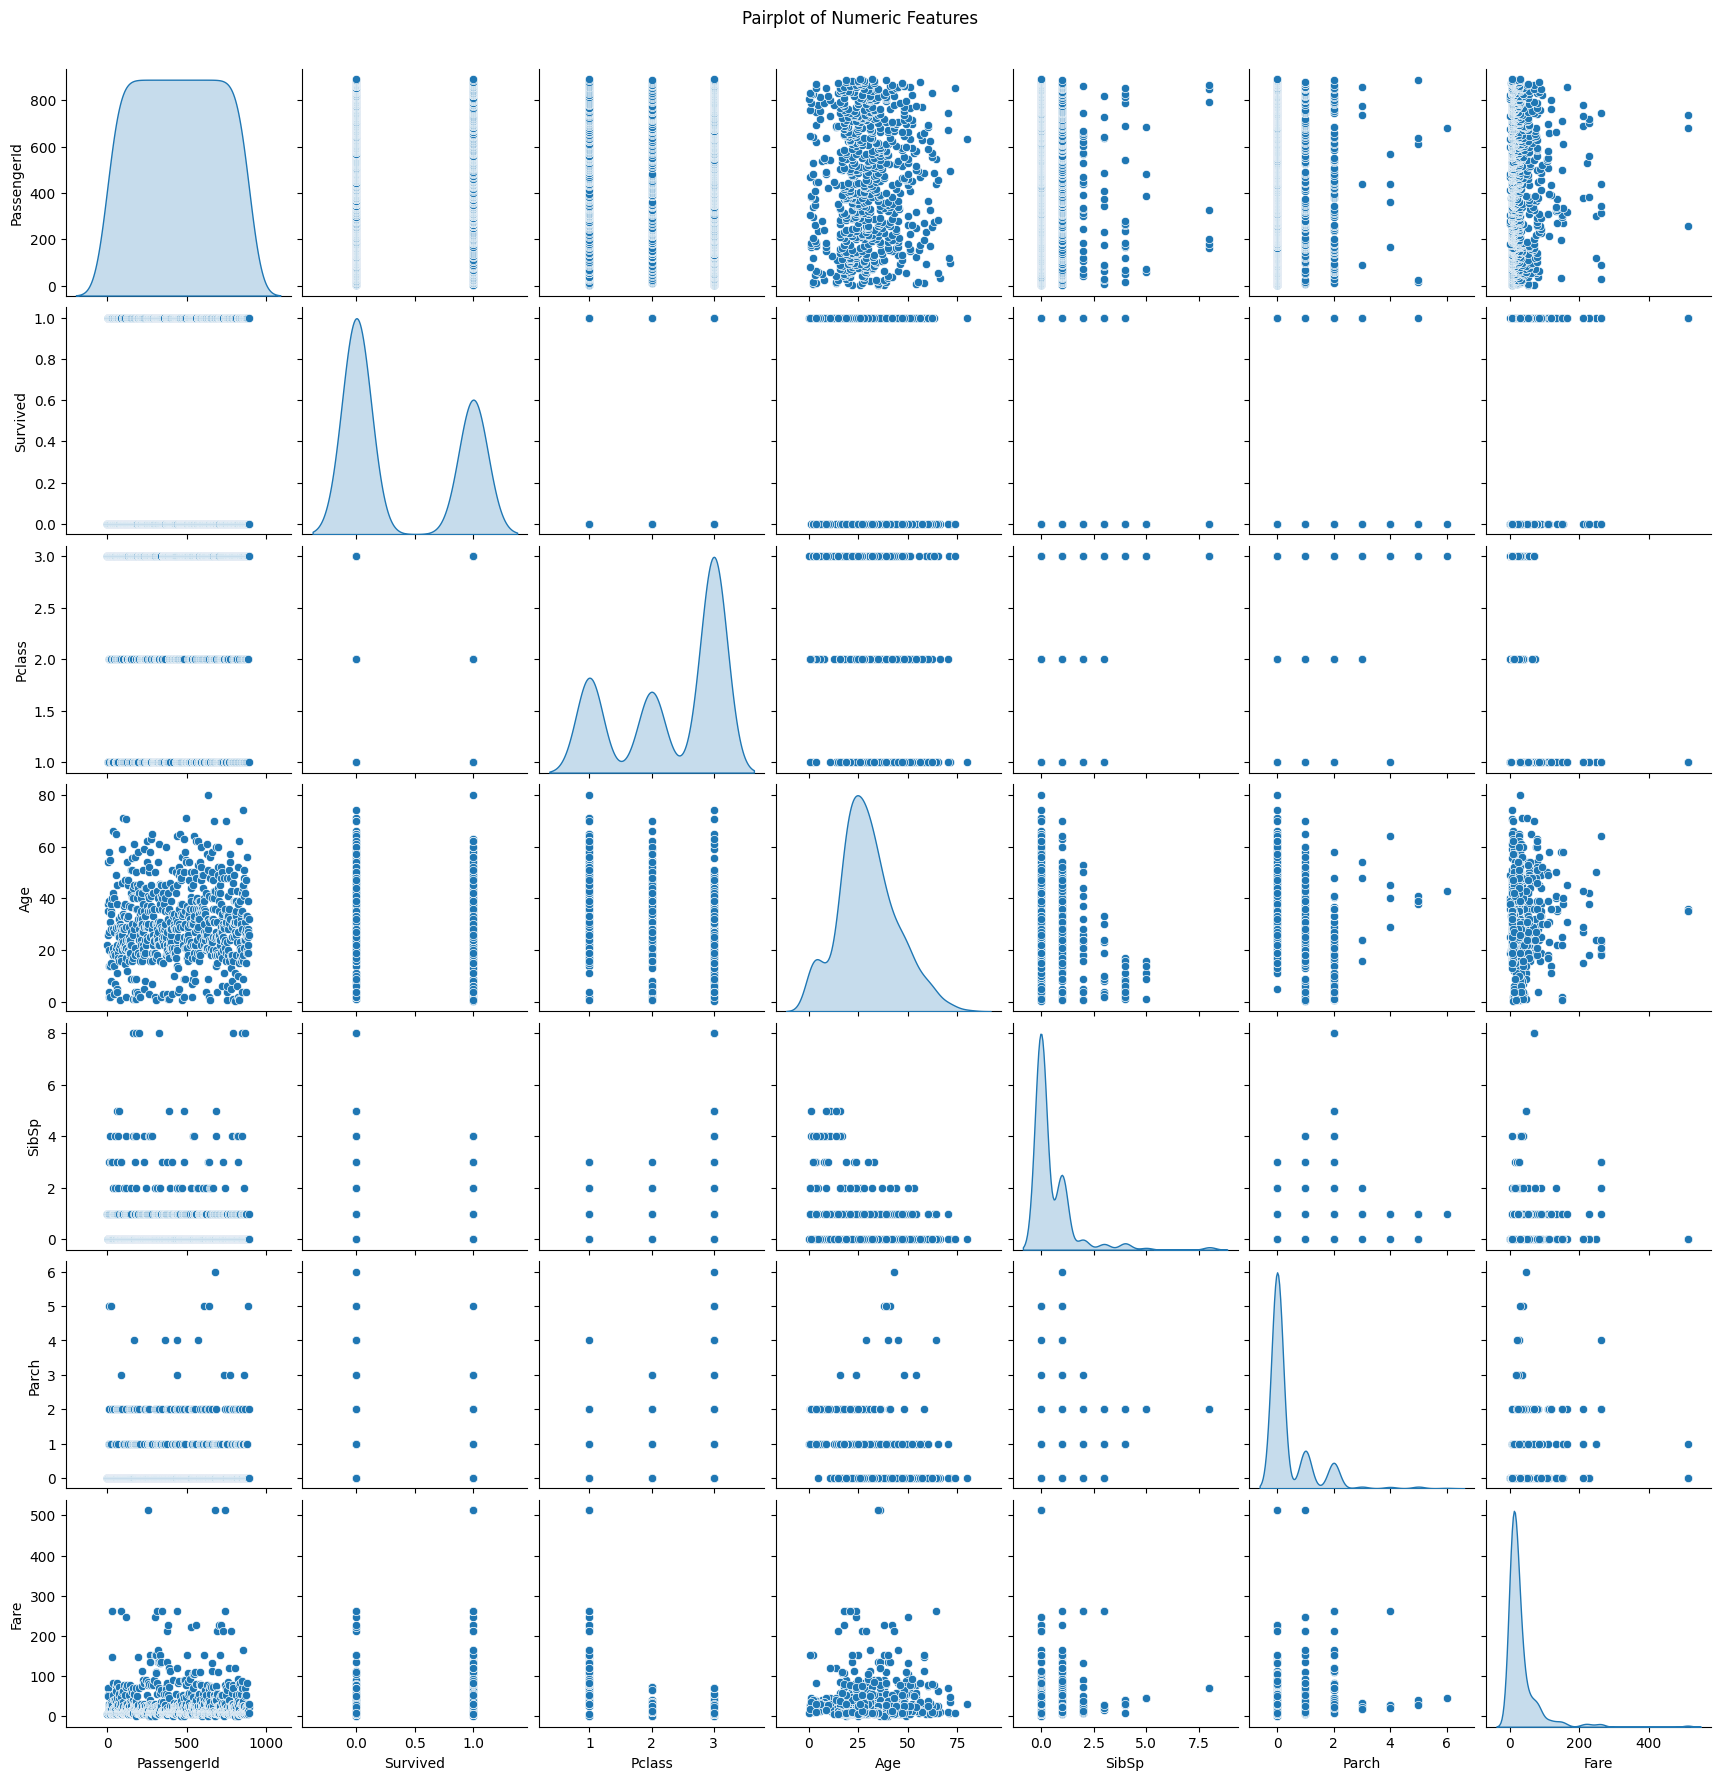


Correlation Matrix:


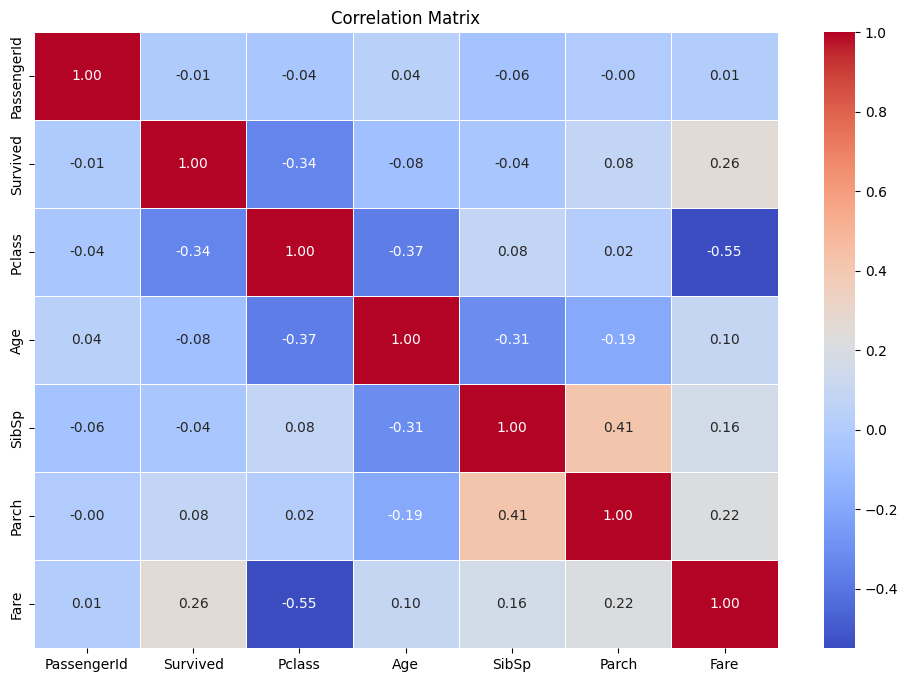

In [5]:
# 3. Use Pairplot and Correlation Matrix for Feature Relationships
# Pairplot (use with caution if dataset is large)
print("\nGenerating Pairplot...")
sns.pairplot(df[numerical_cols], diag_kind='kde')
plt.suptitle("Pairplot of Numeric Features", y=1.02)
plt.show()

# Correlation Matrix Heatmap
print("\nCorrelation Matrix:")
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


In [6]:
# 4. Identify Patterns, Trends, or Anomalies
# Example: Check if any features have strong correlation or skewed distributions
high_corr = correlation_matrix[(correlation_matrix > 0.75) & (correlation_matrix < 1.0)]
print("\nHighly Correlated Pairs (corr > 0.75):")
print(high_corr.dropna(how='all').dropna(axis=1, how='all'))

# Example: Check skewness
print("\nSkewness of Numeric Features:")
print(df[numerical_cols].skew())



Highly Correlated Pairs (corr > 0.75):
Empty DataFrame
Columns: []
Index: []

Skewness of Numeric Features:
PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.389108
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64


In [7]:
# 5. Basic Feature-Level Inferences
# Inference Example Code (optional: adjust per dataset)
for col in numerical_cols:
    skew = df[col].skew()
    if skew > 1:
        print(f"{col} is highly right-skewed.")
    elif skew < -1:
        print(f"{col} is highly left-skewed.")
    else:
        print(f"{col} is fairly symmetric.")


PassengerId is fairly symmetric.
Survived is fairly symmetric.
Pclass is fairly symmetric.
Age is fairly symmetric.
SibSp is highly right-skewed.
Parch is highly right-skewed.
Fare is highly right-skewed.
